In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hackerearth-carnival-wars-challenge/sample_submission.csv
/kaggle/input/hackerearth-carnival-wars-challenge/train.csv
/kaggle/input/hackerearth-carnival-wars-challenge/test.csv


# Import necessary packeges

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

## Read dataset

In [53]:
df=pd.read_csv('../input/hackerearth-carnival-wars-challenge/train.csv',index_col='Product_id')
df.head(25)

df_test=pd.read_csv('../input/hackerearth-carnival-wars-challenge/test.csv',index_col='Product_id')
df_test.head(25)


,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
Product_id,,,,,,,,,,,,,
SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244
ACCE558KZHEPZYMG,28.0,2016-03-18 18:16:45.000,62,Dariah,Yes,Technology,0,38,0,478.0,15.0,4545.0,13745
ACCEAZCVAMFHDPY7,5.0,2015-08-16 20:12:39.000,104,Felipe,Yes,Hospitality,0,58,0,215.0,14.0,2594.0,7519
NKCDYNY37JPBGBVM,12.0,2015-09-24 16:25:16.000,23,Hadi,No,Organic,2,31,0,122.0,7.0,959.0,3850
NKCEY8KWY33FCUYD,48.0,2015-11-21 07:35:44.000,24,Sapphira,Yes,Pet_care,0,69,0,106.0,9.0,6347.0,8520


In [54]:
print(df.shape)

print(df_test.shape)

(6368, 14)
(3430, 13)


## Handling missing values

In [55]:
print(df.isnull().sum().sort_values())

print(df_test.isnull().sum().sort_values())

instock_date          0
Market_Category       0
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Stall_no              5
Discount_avail       38
Minimum_price        38
Selling_Price        41
charges_1           198
charges_2 (%)       205
Customer_name       211
Maximum_price       343
dtype: int64
instock_date         0
Market_Category      0
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
Maximum_price        0
Stall_no             1
charges_2 (%)        5
Minimum_price       14
charges_1           36
Customer_name       53
dtype: int64


In [56]:
df=df.drop(['Customer_name'],axis=1)
df=df.drop(['instock_date'],axis=1)

df_test= df_test.drop(['Customer_name'],axis=1)
df_test=df_test.drop(['instock_date'],axis=1)

In [57]:
df = df[df['Maximum_price'].notna()]
df = df[df['Stall_no'].notna()]
df = df[df['Discount_avail'].notna()]
df = df[df['charges_1'].notna()]
df = df[df['charges_2 (%)'].notna()]
df = df[df['Minimum_price'].notna()]



df['Stall_no'] = df['Stall_no'].fillna(df['Stall_no'].median())
df['Discount_avail'] = df['Discount_avail'].fillna(df['Discount_avail'].mode()[0])
df['Minimum_price'] = df['Minimum_price'].fillna(df['Minimum_price'].mean())
df['charges_1'] = df['charges_1'].fillna(df['charges_1'].median())
df['charges_2 (%)'] = df['charges_2 (%)'].fillna(df['charges_2 (%)'].mean())
df['Maximum_price'] = df['Maximum_price'].fillna(df['Maximum_price'].mean())

df['Stall_no'] = df['Stall_no'].astype('int')
df['Discount_avail'] = df['Discount_avail'].astype('int')
df['Minimum_price'] = df['Minimum_price'].astype('int')
df['charges_1'] = df['charges_1'].astype('int')
df['charges_2 (%)'] = df['charges_2 (%)'].astype('int')
df['Maximum_price'] = df['Maximum_price'].astype('int')


#df.isnull().sum().sort_values()



df_test['Stall_no'] = df_test['Stall_no'].fillna(df_test['Stall_no'].median())
df_test['charges_1'] = df_test['charges_1'].fillna(df_test['charges_1'].median())
df_test['charges_2 (%)'] = df_test['charges_2 (%)'].fillna(df_test['charges_2 (%)'].median())
df_test['Minimum_price'] = df_test['Minimum_price'].fillna(df_test['Minimum_price'].mean())

df_test['Stall_no'] = df_test['Stall_no'].astype('int')
df_test['Discount_avail'] = df_test['Discount_avail'].astype('int')
df_test['Minimum_price'] = df_test['Minimum_price']
df_test['charges_1'] = df_test['charges_1'].astype('int')
df_test['charges_2 (%)'] = df_test['charges_2 (%)'].astype('int')
df_test['Maximum_price'] = df_test['Maximum_price']

#df_test.isnull().sum().sort_values()

df['Diff'] = df['Maximum_price'] - df['Minimum_price']
df['Total'] = df['Maximum_price'] + df['Minimum_price']
df['Average_price'] = (df['Maximum_price'] + df['Minimum_price'])/2
df['Max_Min_ratio'] = df['Maximum_price'] / df['Minimum_price']
df['Max_Min_mul'] = df['Maximum_price'] * df['Minimum_price']


df_test['Diff'] = df_test['Maximum_price'] - df_test['Minimum_price']
df_test['Total'] = df_test['Maximum_price'] + df_test['Minimum_price']
df_test['Average_price'] = (df_test['Maximum_price'] + df_test['Minimum_price'])/2
df_test['Max_Min_ratio'] = df_test['Maximum_price'] / df_test['Minimum_price']
df_test['Max_Min_mul'] = df_test['Maximum_price'] * df_test['Minimum_price']



In [58]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()
df['Loyalty_customer'] = lbl_enc.fit_transform(df['Loyalty_customer']).astype(int)
df_test['Loyalty_customer'] = lbl_enc.fit_transform(df_test['Loyalty_customer']).astype(int)

df['Product_Category'] = lbl_enc.fit_transform(df['Product_Category']).astype(int)
df_test['Product_Category'] = lbl_enc.fit_transform(df_test['Product_Category']).astype(int)

## Some EDA

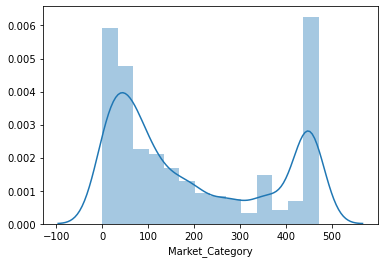

In [59]:
sns.distplot(df['Market_Category'])

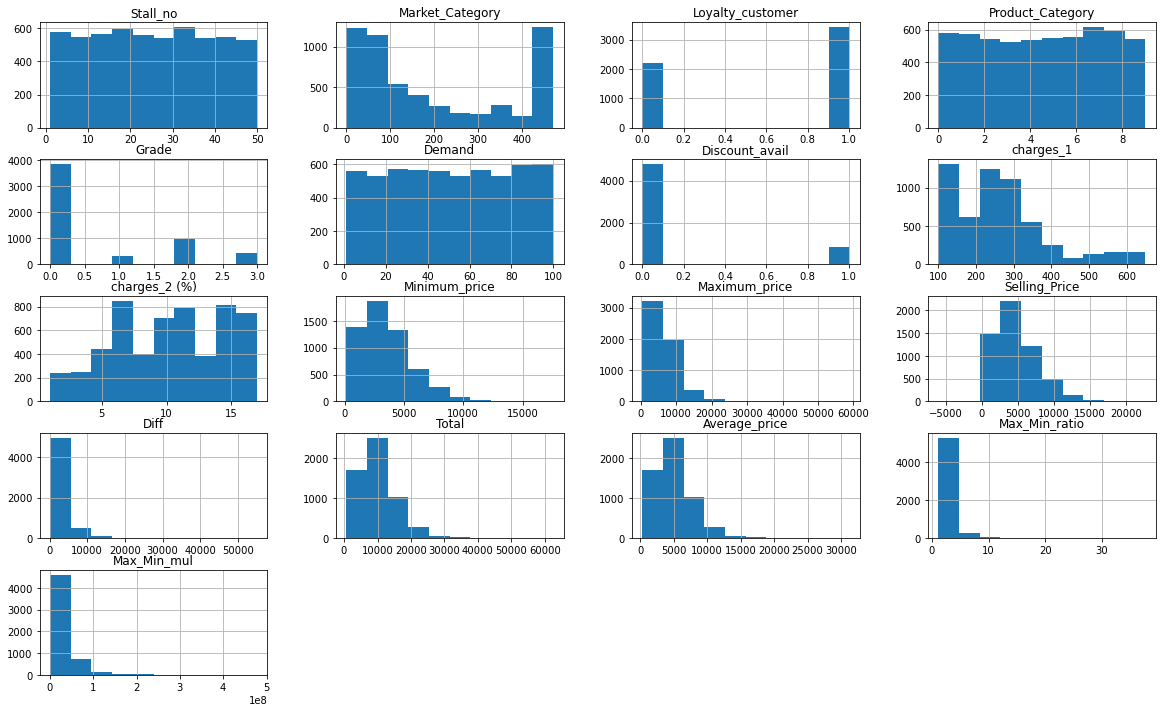

In [60]:
# plt.subplots()
_=df.hist(figsize=(20,12))

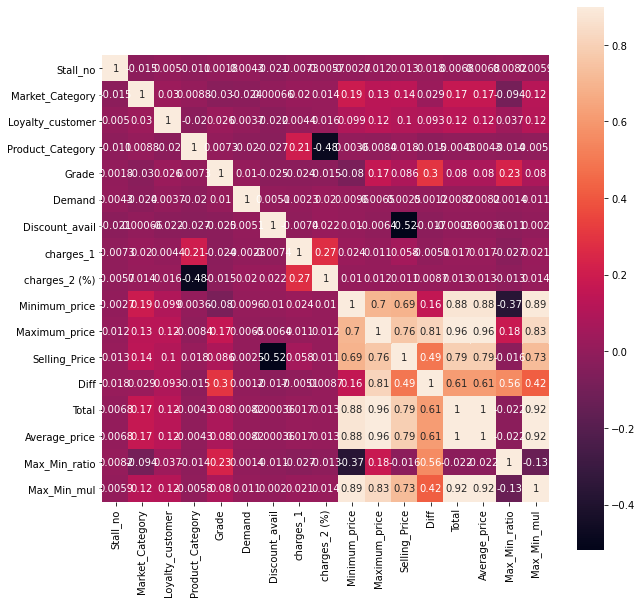

In [61]:
corrmat = df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

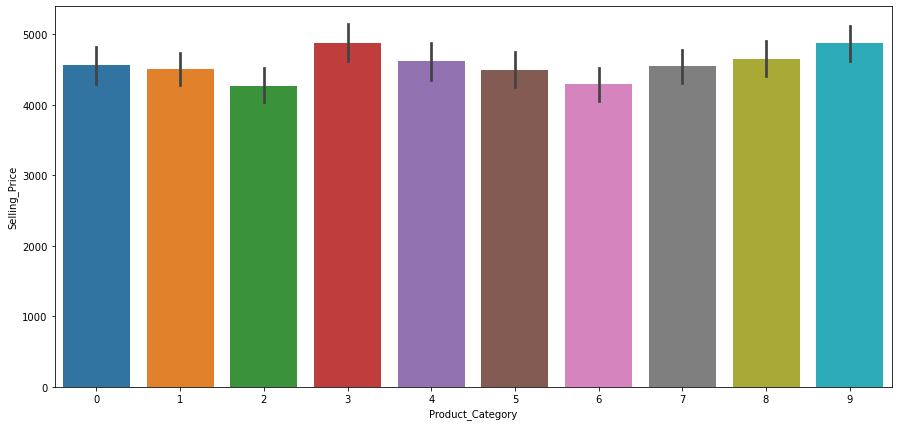

In [62]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['Product_Category'],y=df['Selling_Price'])

In [63]:
df = df[df.Selling_Price >= 0]
df.shape

(5558, 17)

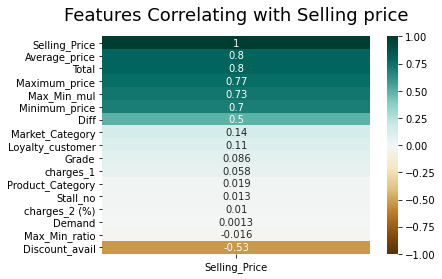

In [64]:
heatmap = sns.heatmap(df.corr()[['Selling_Price']].sort_values(by='Selling_Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Selling price', fontdict={'fontsize':18}, pad=16);

# Spliting the data and fitting the model

In [65]:

#split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#models
from sklearn.linear_model import LogisticRegression ,LinearRegression 
from sklearn.svm import LinearSVR , NuSVR
from xgboost import XGBRFRegressor as xgb
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor , ExtraTreesRegressor , AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor as dt
from catboost import CatBoostRegressor as cbr
from lightgbm import LGBMRegressor as lgbm
import xgboost as xgb


#cv
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import mean_squared_error
import math

In [66]:
df1=df
x=df1.drop(['Selling_Price'],axis=1)
y=df1['Selling_Price']
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.20,random_state=42)

## Extra tree regressor

In [67]:
from sklearn.metrics import mean_squared_log_error
df_etr_filter = x.filter(['Maximum_price','Discount_avail','Diff','Total','Minimum_price',
                         'charges_1','Product_Category','Average_price','Max_Min_ratio','Max_Min_mul'])
df_etr_filter_val = x_val.filter(['Maximum_price','Discount_avail','Diff','Total','Minimum_price',
                         'charges_1','Product_Category','Average_price','Max_Min_ratio','Max_Min_mul'])

etr=ExtraTreesRegressor(n_estimators= 1700,random_state = 1, max_depth = 15,verbose = 1)
etr.fit(df_etr_filter,y)
y_pred=(etr.predict(df_etr_filter_val))
score = max(0,100-np.sqrt(mean_squared_log_error( y_val, y_pred )))
score


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:   24.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    0.7s finished


99.99793324686122

In [68]:
for name, importance in zip(x_train, etr.feature_importances_):
    print(name, "=", importance)
#df_etr_filter = df_test.filter(['Maximum_price','Discount_avail','Diff','Total','Minimum_price','charges_1'])


Stall_no = 0.10531506388210073
Market_Category = 0.2990028682769689
Loyalty_customer = 0.003646432796530164
Product_Category = 0.21334122971472771
Grade = 0.04508619194873776
Demand = 0.0015920550428589063
Discount_avail = 0.0002461507315561998
charges_1 = 0.21869707994739618
charges_2 (%) = 0.00019461891625092566
Minimum_price = 0.11287830874287258


## Stack model

In [ ]:
ts = time.time()
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
df_ep_filter = x.filter(['Maximum_price','Discount_avail','Diff','Total','Minimum_price',
                         'charges_1','Product_Category','Average_price','Max_Min_ratio','Max_Min_mul'])
df_ep_filter_val = x_val.filter(['Maximum_price','Discount_avail','Diff','Total','Minimum_price',
                                'charges_1','Product_Category','Average_price','Max_Min_ratio','Max_Min_mul'])

exported_pipeline = make_pipeline(StackingEstimator(ExtraTreesRegressor(n_estimators= 1700,random_state = 1, max_depth = 15,verbose = 1)),
                                                ExtraTreesRegressor(n_estimators= 1700,random_state = 1, max_depth = 15,verbose = 1))

exported_pipeline.fit(df_ep_filter,y)
y_pred=(exported_pipeline.predict(df_ep_filter_val))
score = max(0,100-np.sqrt(mean_squared_log_error( y_val, y_pred )))
print(score)
print(time.time() - ts)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:   28.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
df_test_filter = df_test.filter(['Maximum_price','Discount_avail','Diff','Total','Minimum_price',
                         'charges_1','Product_Category','Average_price','Max_Min_ratio','Max_Min_mul'])

final_pred = exported_pipeline.predict(df_test_filter)

# Preparing submission file

In [ ]:
df_test.insert(1, "Selling_Price",final_pred , True)

In [ ]:
df_test['Selling_Price']

In [ ]:
df_filter = df_test.filter(['Selling_Price'])
#df_filter = df_filter.rename(columns = {'Label': 'Survived'}, inplace = False)
df_filter.head()

In [ ]:
df_filter.to_csv('./datamanupulate.csv')